In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from xgboost import plot_importance
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load preprocessed data
X_train = pd.read_csv("cleanData_CV/X_train.csv")
X_test = pd.read_csv("cleanData_CV/X_test.csv")
y_train = pd.read_csv("cleanData_CV/y_train.csv", header = None)
y_test = pd.read_csv("cleanData_CV/y_test.csv", header = None)
y_train = y_train[0]
y_test = y_test[0]

In [3]:
# Define error measure for official scoring : RMSE
#def rmse(y_train, y_train_pred):
#    return(np.sqrt(mean_squared_error(y_train, y_train_pred)))

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [4]:
'''# Gridsearch - too long
scorerX = make_scorer(mean_squared_error, greater_is_better = False)

param_grid = {"n_estimators" : [200, 300, 400], 
              "max_depth" : [1, 2, 3, 4], 
              "learning_rate" : [0.03, 0.04, 0.05, 0.06, 0.07, 0.08], 
              "gamma" : [0, 0.005, 0.01, 0.012, 0.015], 
              "min_child_weight" : [1, 2, 3, 4], 
              "subsample" : [0.65, 0.7, 0.75, 0.8, 0.85], 
              "colsample_bytree" : [0.55, 0.6, 0.65, 0.7, 0.75], 
             }

gs = GridSearchCV(estimator = xgb.XGBRegressor(), 
                  param_grid = param_grid, 
                  scoring = scorerX, 
                  cv = 10,
                  n_jobs = 6, 
                  verbose = 5)

gs = gs.fit(X_train, y_train)
print(np.sqrt(-gs.best_score_))
print(gs.best_params_)'''

'# Gridsearch - too long\nscorerX = make_scorer(mean_squared_error, greater_is_better = False)\n\nparam_grid = {"n_estimators" : [200, 300, 400], \n              "max_depth" : [1, 2, 3, 4], \n              "learning_rate" : [0.03, 0.04, 0.05, 0.06, 0.07, 0.08], \n              "gamma" : [0, 0.005, 0.01, 0.012, 0.015], \n              "min_child_weight" : [1, 2, 3, 4], \n              "subsample" : [0.65, 0.7, 0.75, 0.8, 0.85], \n              "colsample_bytree" : [0.55, 0.6, 0.65, 0.7, 0.75], \n             }\n\ngs = GridSearchCV(estimator = xgb.XGBRegressor(), \n                  param_grid = param_grid, \n                  scoring = scorerX, \n                  cv = 10,\n                  n_jobs = 6, \n                  verbose = 5)\n\ngs = gs.fit(X_train, y_train)\nprint(np.sqrt(-gs.best_score_))\nprint(gs.best_params_)'

In [5]:
'''# RandomizedSearch
scorerX = make_scorer(mean_squared_error, greater_is_better = False)

param_grid = {"n_estimators" : [200, 300, 400], 
              "max_depth" : [1, 2, 3, 4], 
              "learning_rate" : [0.03, 0.04, 0.05, 0.06, 0.07, 0.08], 
              "gamma" : [0, 0.005, 0.01, 0.012, 0.015], 
              "min_child_weight" : [1, 2, 3, 4], 
              "subsample" : [0.65, 0.7, 0.75, 0.8, 0.85], 
              "colsample_bytree" : [0.55, 0.6, 0.65, 0.7, 0.75], 
             }

gs = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                        param_distributions  = param_grid, 
                        n_iter = 150, 
                        scoring = scorerX, 
                        cv = 10,
                        n_jobs = 6, 
                        verbose = 5)

gs = gs.fit(X_train, y_train)
print(np.sqrt(-gs.best_score_))
print(gs.best_params_)'''

'# RandomizedSearch\nscorerX = make_scorer(mean_squared_error, greater_is_better = False)\n\nparam_grid = {"n_estimators" : [200, 300, 400], \n              "max_depth" : [1, 2, 3, 4], \n              "learning_rate" : [0.03, 0.04, 0.05, 0.06, 0.07, 0.08], \n              "gamma" : [0, 0.005, 0.01, 0.012, 0.015], \n              "min_child_weight" : [1, 2, 3, 4], \n              "subsample" : [0.65, 0.7, 0.75, 0.8, 0.85], \n              "colsample_bytree" : [0.55, 0.6, 0.65, 0.7, 0.75], \n             }\n\ngs = RandomizedSearchCV(estimator = xgb.XGBRegressor(), \n                        param_distributions  = param_grid, \n                        n_iter = 150, \n                        scoring = scorerX, \n                        cv = 10,\n                        n_jobs = 6, \n                        verbose = 5)\n\ngs = gs.fit(X_train, y_train)\nprint(np.sqrt(-gs.best_score_))\nprint(gs.best_params_)'

In [6]:
print("best result : 'gamma': 0, 'learning_rate': 0.06, 'subsample': 0.75, 'max_depth': 4, \
'min_child_weight': 2, 'n_estimators': 400, 'colsample_bytree': 0.75")

best result : 'gamma': 0, 'learning_rate': 0.06, 'subsample': 0.75, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 400, 'colsample_bytree': 0.75


RMSE on Training set : 0.118613025845
RMSE on Test set : 0.11537565187


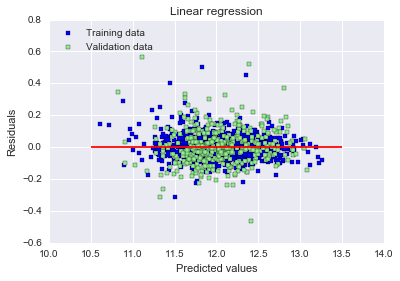

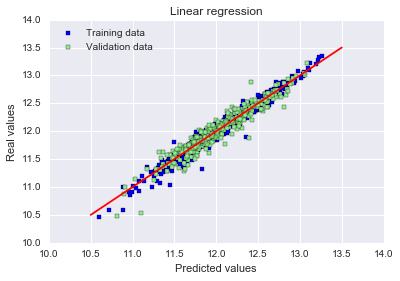

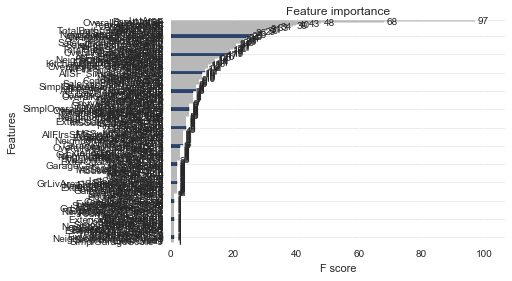

In [28]:
# xgboost
xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = 0.7)
xgboost.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
print("RMSE on Test set :", rmse_cv_test(xgboost).mean())
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
plot_importance(xgboost)
plt.show()

In [29]:
# Write predictions in CSV file
now = datetime.datetime.now()
xgb_name = "preds/xgboost_CV_" + str(now.strftime("%Y-%m-%d-%H-%M")) + ".csv"
preds = pd.DataFrame({"SalePrice": np.expm1(xgboost.predict(X_test))}, columns = ["SalePrice"])
preds.to_csv(xgb_name, index = False)

x = 200
x = 225
x = 250
x = 275
x = 300
x = 325
x = 350
x = 375
x = 400


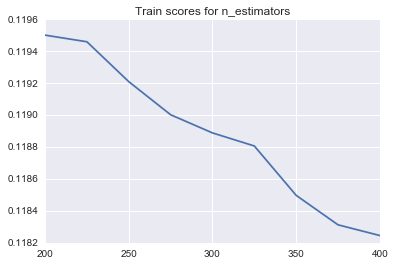

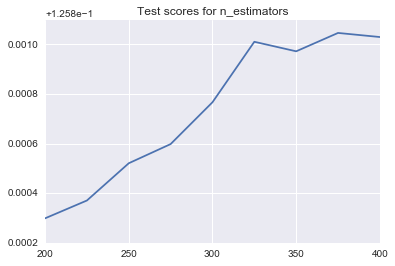

In [9]:
# Plotting scores against n_estimators
nEstimators = [200, 225, 250, 275, 300, 325, 350, 375, 400]
train_scores = []
test_scores = []
for x in nEstimators:
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for n_estimators")
plt.plot(nEstimators, train_scores)
plt.show()
plt.title("Test scores for n_estimators")
plt.plot(nEstimators, test_scores)
plt.show()

x = 1
x = 2
x = 3
x = 4
x = 5
x = 10


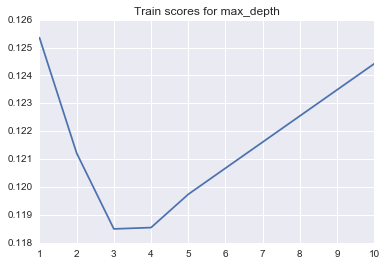

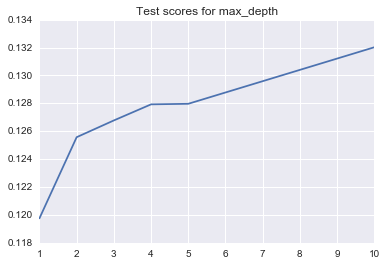

In [17]:
# Plotting scores against max_depth
max_depth = [1, 2, 3, 4, 5, 10]
train_scores = []
test_scores = []
for x in max_depth:
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for max_depth")
plt.plot(max_depth, train_scores)
plt.show()
plt.title("Test scores for max_depth")
plt.plot(max_depth, test_scores)
plt.show()


x = 0.02
x = 0.03
x = 0.04
x = 0.05
x = 0.06
x = 0.07
x = 0.08
x = 0.09
x = 0.1


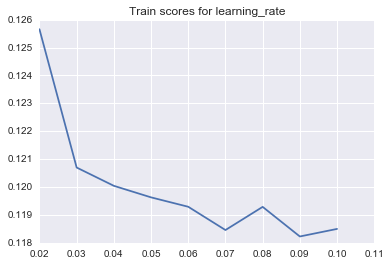

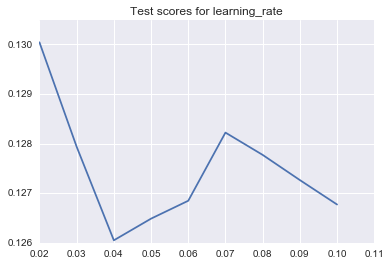

In [18]:
# Plotting scores against learning_rate
learning_rate = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
train_scores = []
test_scores = []
for x in learning_rate:
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for learning_rate")
plt.plot(learning_rate, train_scores)
plt.show()
plt.title("Test scores for learning_rate")
plt.plot(learning_rate, test_scores)
plt.show()


x = 0
x = 0.001
x = 0.002
x = 0.003
x = 0.004
x = 0.005
x = 0.006
x = 0.007
x = 0.008
x = 0.009
x = 0.01
x = 0.012
x = 0.015


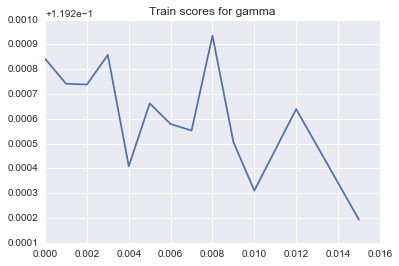

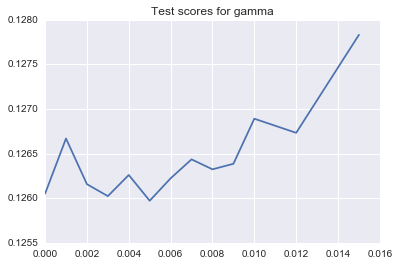

In [19]:
# Plotting scores against gamma
gamma = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015]
train_scores = []
test_scores = []
for x in gamma:
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for gamma")
plt.plot(gamma, train_scores)
plt.show()
plt.title("Test scores for gamma")
plt.plot(gamma, test_scores)
plt.show()


x = 1
x = 2
x = 3
x = 4
x = 5


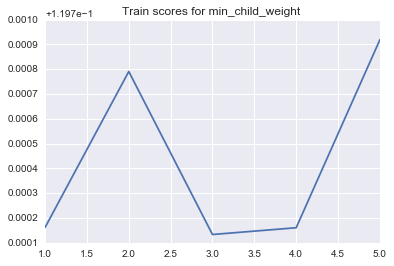

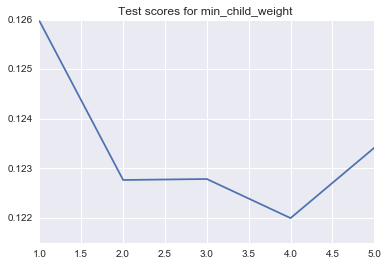

In [20]:
# Plotting scores against min_child_weight 
min_child_weight  = [1, 2, 3, 4, 5]
train_scores = []
test_scores = []
for x in min_child_weight :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for min_child_weight ")
plt.plot(min_child_weight , train_scores)
plt.show()
plt.title("Test scores for min_child_weight ")
plt.plot(min_child_weight , test_scores)
plt.show()


x = 0.6
x = 0.65
x = 0.7
x = 0.75
x = 0.8
x = 0.85
x = 0.9


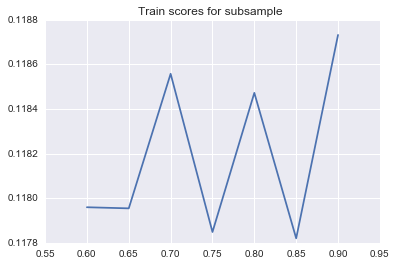

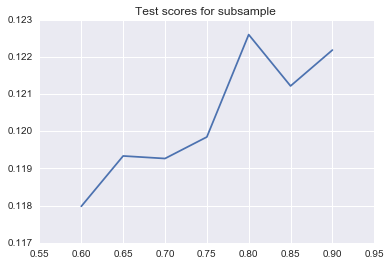

In [21]:
# Plotting scores against subsample 
subsample  = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
train_scores = []
test_scores = []
for x in subsample :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for subsample ")
plt.plot(subsample , train_scores)
plt.show()
plt.title("Test scores for subsample ")
plt.plot(subsample , test_scores)
plt.show()


x = 0.3
x = 0.35
x = 0.4
x = 0.45
x = 0.5
x = 0.55
x = 0.6
x = 0.65
x = 0.7
x = 0.75
x = 0.8
x = 0.85
x = 0.9
x = 0.95
x = 1


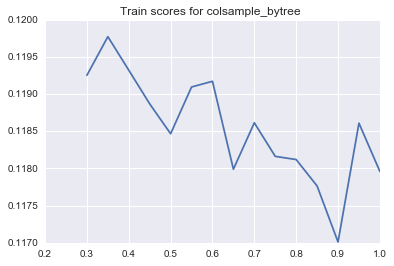

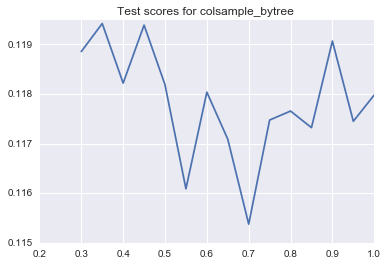

In [22]:
# Plotting scores against colsample_bytree 
colsample_bytree  = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
train_scores = []
test_scores = []
for x in colsample_bytree :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for colsample_bytree ")
plt.plot(colsample_bytree , train_scores)
plt.show()
plt.title("Test scores for colsample_bytree ")
plt.plot(colsample_bytree , test_scores)
plt.show()


x = 0.5
x = 0.55
x = 0.6
x = 0.65
x = 0.7
x = 0.75
x = 0.8
x = 0.85
x = 0.9
x = 0.95
x = 1


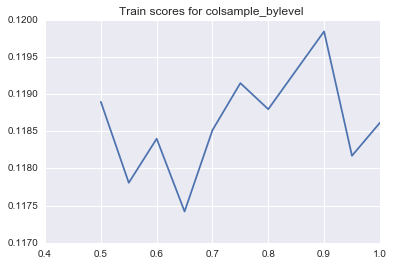

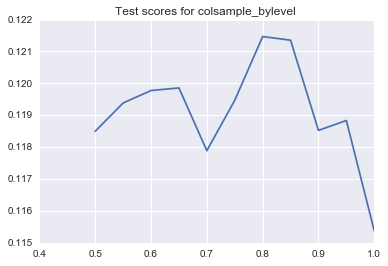

In [23]:
# Plotting scores against colsample_bylevel 
colsample_bylevel  = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
train_scores = []
test_scores = []
for x in colsample_bylevel :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = 0.7, 
                               colsample_bylevel = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for colsample_bylevel ")
plt.plot(colsample_bylevel , train_scores)
plt.show()
plt.title("Test scores for colsample_bylevel ")
plt.plot(colsample_bylevel , test_scores)
plt.show()


x = 0
x = 0.001
x = 0.003
x = 0.01
x = 0.03
x = 0.1
x = 0.3


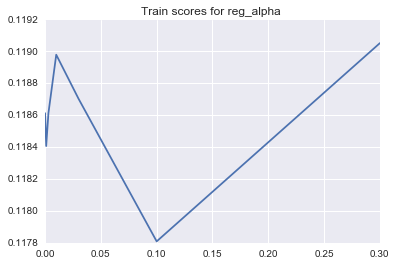

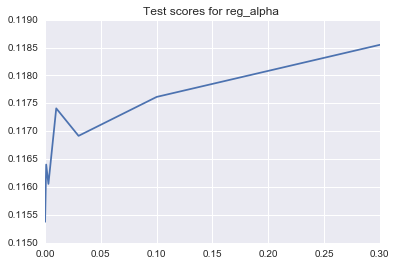

In [24]:
# Plotting scores against reg_alpha  
reg_alpha   = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
train_scores = []
test_scores = []
for x in reg_alpha :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = 0.7, 
                               reg_alpha = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for reg_alpha ")
plt.plot(reg_alpha , train_scores)
plt.show()
plt.title("Test scores for reg_alpha ")
plt.plot(reg_alpha , test_scores)
plt.show()


x = 0
x = 0.001
x = 0.003
x = 0.01
x = 0.03
x = 0.1
x = 0.3
x = 0.6
x = 1


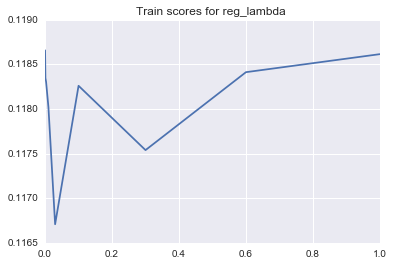

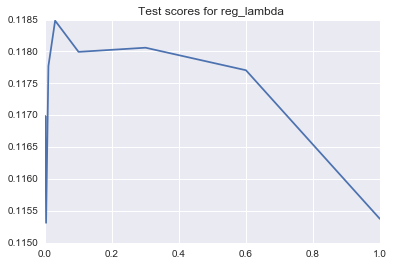

In [25]:
# Plotting scores against reg_lambda  
reg_lambda   = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.6, 1]
train_scores = []
test_scores = []
for x in reg_lambda :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = 0.7, 
                               reg_lambda = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for reg_lambda ")
plt.plot(reg_lambda , train_scores)
plt.show()
plt.title("Test scores for reg_lambda ")
plt.plot(reg_lambda , test_scores)
plt.show()


x = 0
x = 0.1
x = 0.2
x = 0.3
x = 0.4
x = 0.5
x = 0.6
x = 0.7
x = 0.8
x = 0.9
x = 1


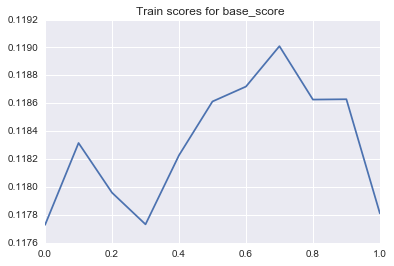

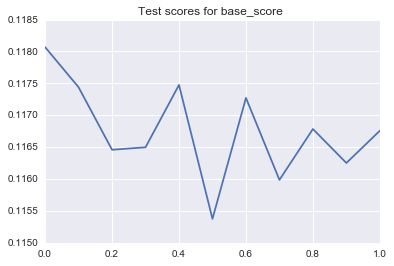

In [26]:
# Plotting scores against base_score  
base_score = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_scores = []
test_scores = []
for x in base_score :
    print("x = " + str(x))
    xgboost = xgb.XGBRegressor(nthread = njobs, 
                               n_estimators = 350, 
                               max_depth = 3, 
                               learning_rate = 0.04, 
                               gamma = 0.005, 
                               min_child_weight = 4, 
                               subsample = 0.60, 
                               colsample_bytree = 0.7, 
                               base_score = x)
    xgboost.fit(X_train, y_train)
    train_score = rmse_cv_train(xgboost).mean()
    test_score = rmse_cv_test(xgboost).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for base_score ")
plt.plot(base_score , train_scores)
plt.show()
plt.title("Test scores for base_score ")
plt.plot(base_score , test_scores)
plt.show()
